<p><img alt="Colaboratory logo" height="240px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Logo_EAFIT.svg/2560px-Logo_EAFIT.svg.png" align="center" hspace="350px" vspace="0px"></p>

# **<center> Modelos</center>**



<center>


*Jeferson Stiven Arboleda Colorado* \\


</center>

A continuación se realizará la configuración del entorno que nos permitirá desplegar los modelos definidos

In [ ]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"

2.0.0+cu118
11.8


In [ ]:
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 68.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 28.2 MB/s eta 0:00:00
Looking in indexes: 

In [ ]:
!pip install torch-geometric-temporal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 38.3 MB/s eta 0:00:00
  Created wheel for torch-geometric-temporal: filename=torch_geometric_temporal-0.54.0-py3-none-any.whl size=86746 sha256=9c9eb65cb898cdd5f368b8116a216d98a706b962cbb441a970fae1e6e20d74bc
  Stored in directory: /root/.cache/pip/wheels/9e/9b/b6/e15256e053f0cb49b1084a67a709db909d418386a231f0722c
Successfully built torch-geometric-temporal
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 107.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 66.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## **Funciones**


Se definen las funciones necesarias para nuestro análisis.

In [ ]:
def data_scaler(data):
  """
  Take a data matrix and returns a scaler matrix, using StandardScaler from 
  preprocessing module in scikit-learn library

  Arguments:
  ---------
  data
    Data matrix
  
  Returns:
  -------
  Returns a scaler matrix
  """
  scale = preprocessing.StandardScaler().fit(data)
  return scale.transform(data)

In [ ]:
def metrics(y_real,y_pred):
  """
  Take a predicted and real vector, after that evaluate MAE, MSE, R2, metrics.

  Arguments:
  ---------
  y_real
    real vector
  y_pred
    predicted vector
  Returns:
  -------
  Returns metrics values
  """
  MAE =  mean_absolute_error(y_real, y_pred)
  MSE = mean_squared_error(y_real, y_pred)
  R2 = r2_score(y_real, y_pred)
  print('MAE : ', MAE)
  print('MSE : ', MSE)
  print('R^2 : ', R2)
  return {'MAE': MAE, 'MSE': MSE, 'R2': R2}

In [ ]:
def plot_feature_importances(model, X):
  """
  Function to plot features importance result from RandomForest algorithm

  Arguments:
  ---------
  model
    model asocciated with randomforest
  X
    Features matriz
  Returns:
  -------
  Returns feature importance graph
  """
  n_features = X.shape[1]
  plt.figure(figsize=(8,8))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), X.columns.to_list())
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  

## **Leamos la matriz de adyacencia**


Esta fue la martriz de adyacencia creada hace unas semanas. Vamos a transformarla a un formato adecuado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_ady = pd.read_csv('/content/drive/MyDrive/Maestria_eafit/adyacencias/adyacencia_barrios.csv', index_col=0)
#df_ady = pd.read_csv('/content/drive/MyDrive/MLProjects/GNNMed/modelos/adyacencia_barrios.csv', index_col=0)
df_ady.head()

,13_05,07_01,05_10,15_11,11_13,03_07,05_08,14_15,03_01,08_04,...,08_13,02_10,07_08,11_08,13_14,03_11,05_07,13_07,06_02,08_05
13_05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
07_01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05_10,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15_11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11_13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Demosle un orden adecuada a los datos, de acuerdo a la necesidad.

In [ ]:
df_ady = df_ady.reset_index().sort_values(by=['index'])

In [ ]:
df_ady.head()

,index,13_05,07_01,05_10,15_11,11_13,03_07,05_08,14_15,03_01,...,08_13,02_10,07_08,11_08,13_14,03_11,05_07,13_07,06_02,08_05
247,01_01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,01_02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,01_03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,01_04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,01_05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Inicialmente con el índice

In [ ]:
cols = df_ady['index'].values

In [ ]:
df_ady = df_ady[cols]

Ahora con las columnas

In [ ]:
df_ady.head()

,01_01,01_02,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,...,16_12,16_13,16_14,16_15,16_16,16_17,16_18,16_19,16_20,16_21
247,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,1,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
251,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creemos el edge_index**

Con lo anterior creamos el edge_index necesario para nuestra implementación.

In [ ]:
adj_t = torch.tensor(df_ady.to_numpy()) 

In [ ]:
edge_index = adj_t.nonzero().t().contiguous()

In [ ]:
edge_index = edge_index.numpy()

Veamos nuestra estructura como quedó

In [ ]:
edge_index

array([[  0,   0,   0, ..., 264, 264, 264],
       [  1,   2,   3, ..., 236, 238, 244]])

La cantidad de relaciones que tenemos está dada por

In [ ]:
edge_index.shape

(2, 1448)

## **Creemos los arreglos dinámicos**


Para esto carguemos inicialmente el DF con los casos por semana

In [ ]:
casos = pd.read_csv('/content/drive/MyDrive/Maestria_eafit/modelos/casos_semana_barrio.csv', index_col=0)
#casos = pd.read_csv('/content/drive/MyDrive/MLProjects/GNNMed/modelos/casos_semana_barrio.csv', index_col=0)
casos.head()

,2018_1,2018_2,2018_3,2018_4,2018_5,2018_6,2018_7,2018_8,2018_9,2018_10,...,2022_41,2022_42,2022_43,2022_44,2022_45,2022_46,2022_47,2022_48,2022_52,key
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,1.0,2.0,1.0,4.0,4.0,0.0,1.0,01_01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,01_02
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,01_03
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,1.0,2.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,01_04
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,01_05


Como podemos ver tenemos un intervalo sin datos entre la semana 48 y la 52 del 2022, por lo que inicialmente quitaremos la semana 52 y los keys asociados con los barrios, pues para nuestro análisis necesitamos solo el conteo, además las filas están ordenadas por comuna y barrio.

In [ ]:
keys = casos.key

In [ ]:
casos.drop(columns=['2022_52','key'], inplace = True)

Estandarizamos los valores para alivianar el tema de escalas que pueda darse entre los diferentes valores númericos

In [ ]:
casos_std = pd.DataFrame(data_scaler(casos), index=casos.index, columns = casos.columns)

In [ ]:
casos_std.head()

,2018_1,2018_2,2018_3,2018_4,2018_5,2018_6,2018_7,2018_8,2018_9,2018_10,...,2022_39,2022_40,2022_41,2022_42,2022_43,2022_44,2022_45,2022_46,2022_47,2022_48
0,-0.137827,-0.427785,-0.231493,-0.366648,-0.405832,-0.493342,-0.258400,-0.470056,-0.398221,-0.370465,...,0.000695,-0.308028,-0.409482,0.038876,-0.340332,-0.152326,-0.251622,0.071630,0.109179,-0.442263
1,-0.352675,-0.427785,-0.445242,-0.366648,-0.405832,-0.493342,-0.436723,-0.470056,-0.398221,-0.195468,...,-0.367547,-0.496110,-0.409482,-0.316372,-0.499675,-0.487317,-0.468115,-0.161277,-0.469468,-0.442263
2,-0.352675,-0.427785,-0.445242,-0.201407,-0.405832,-0.493342,-0.436723,-0.470056,-0.236862,-0.370465,...,-0.551668,-0.308028,-0.260835,-0.316372,-0.499675,-0.319821,-0.251622,-0.044824,-0.469468,-0.442263
3,-0.352675,-0.427785,-0.231493,-0.366648,-0.405832,-0.289386,-0.436723,-0.470056,-0.075504,-0.370465,...,-0.551668,-0.308028,-0.260835,-0.138748,-0.340332,-0.487317,-0.035129,-0.277731,-0.180145,-0.442263
4,-0.352675,-0.427785,-0.445242,-0.201407,-0.405832,-0.289386,-0.436723,-0.470056,-0.398221,-0.370465,...,-0.367547,-0.308028,-0.409482,-0.316372,-0.180990,-0.487317,-0.468115,-0.277731,-0.469468,-0.442263


Podemos dar una mirada gráfica a la serie de tiempo de los dos primeros barrios que se tienen.

array([<Axes: >], dtype=object)

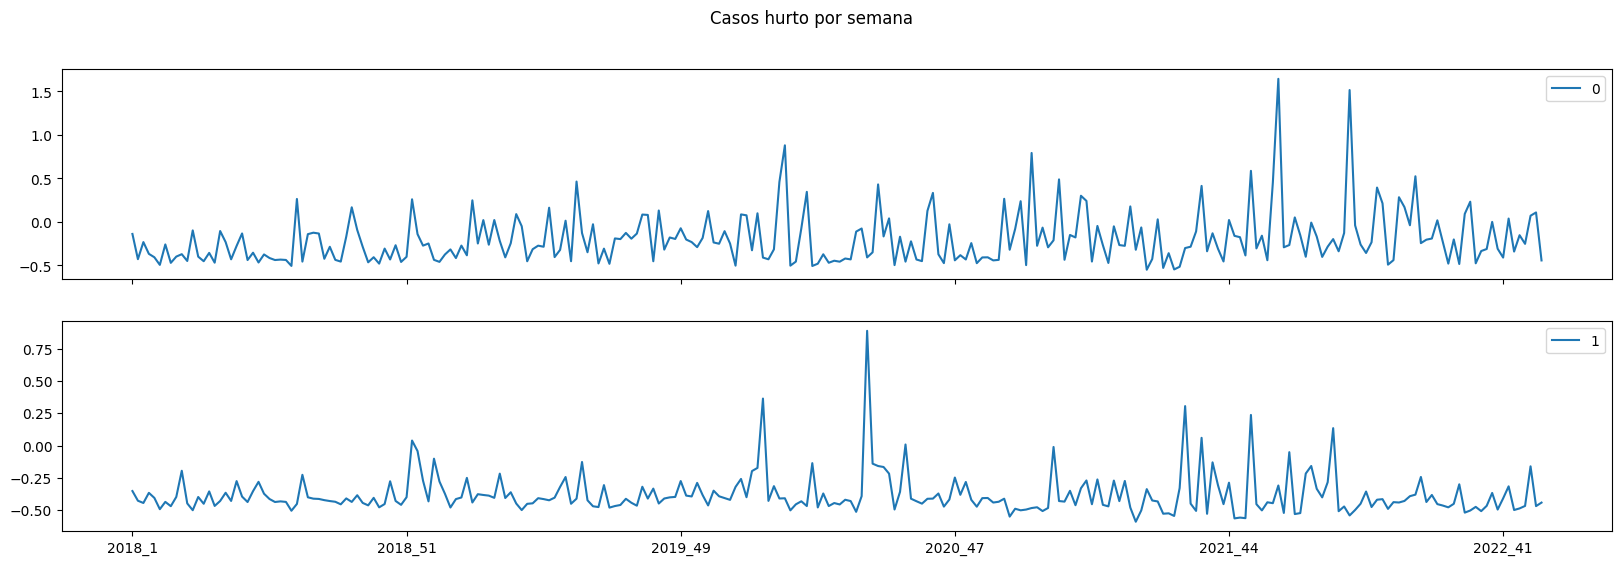

In [ ]:
fig, ax = plt.subplots(2,figsize=(20, 6))

casos_std.iloc[0, :].plot(
    legend   = True,
    subplots = True, 
    sharex   = True,
    title    = 'Casos hurto por semana',
    ax       = ax[0] 
)
casos_std.iloc[1, :].plot(
    legend   = True,
    subplots = True,
    ax       = ax[1] 
)

Para dos casos particulares de la ciudad, Estación villa y Santo Domingo Savio No. 2, encontramos (sin estandarizar):

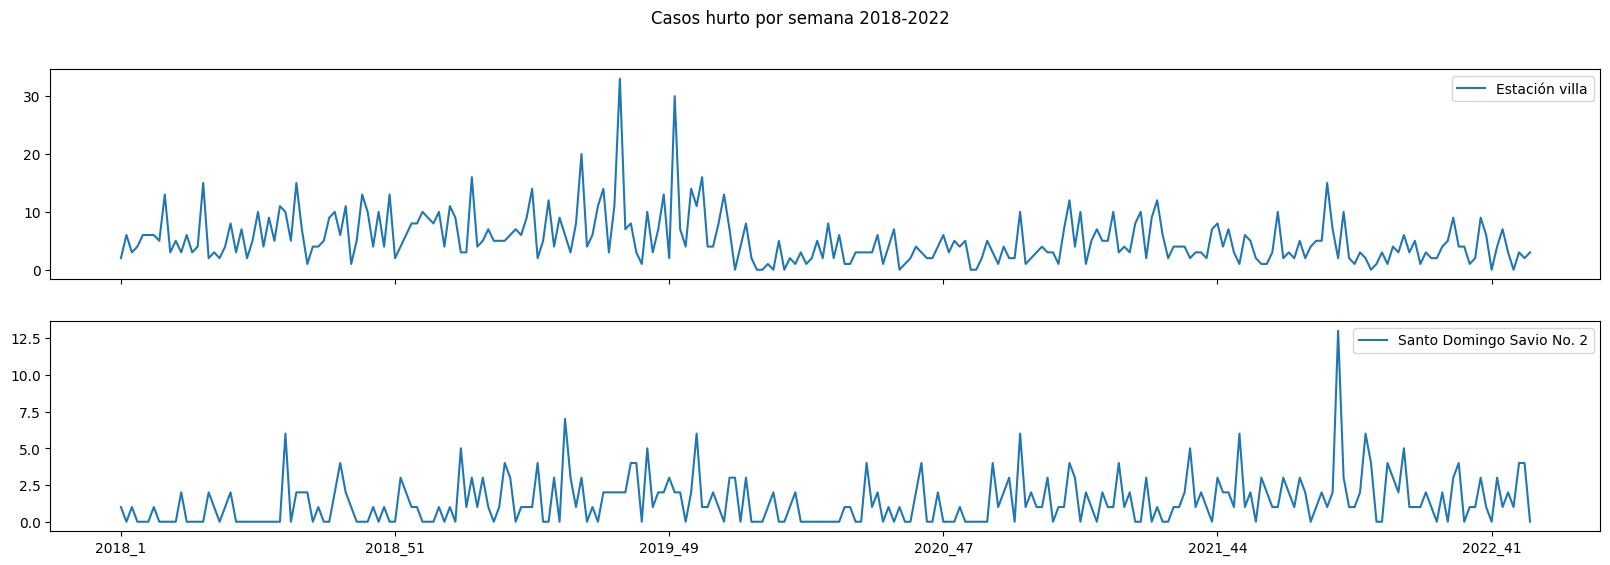

In [ ]:
fig, ax = plt.subplots(2,figsize=(20, 6))

casos.iloc[148, :].plot(
    legend   = True,
    subplots = True, 
    sharex   = True,
    title    = 'Casos hurto por semana 2018-2022',
    ax       = ax[0] 
)
casos.iloc[0, :].plot(
    legend   = True,
    subplots = True,
    ax       = ax[1] 
)
ax[0].legend(['Estación villa'])
ax[1].legend(['Santo Domingo Savio No. 2'])


**Arreglo con ventana de tiempo 4 semanas**

A continuación creamos nuestro arreglo tomando como ventana temporal 4 semanas, donde recordemos en las filas tenemos los barrios

In [ ]:
x_vals = []
y_target = []
for val in range(258):
  n = val +3
  filter = casos_std.iloc[:,val:(n+1)].values
  target = casos_std.iloc[:,(n+1)].values
  x_vals.append(filter)
  y_target.append(target)
  if n == 256:
    print('stop', val)
    break


stop 253


In [ ]:
x_vals = []
y_target = []
for val in range(258):
  n = val +3
  filter = casos.iloc[:,val:(n+1)].values
  target = casos.iloc[:,(n+1)].values
  x_vals.append(filter)
  y_target.append(target)
  if n == 256:
    print('stop', val)
    break


stop 253


In [ ]:
len(x_vals), len(y_target)

(254, 254)

Ahora podemos aplicar lo visto en el ejemplo compartido por el profesor. En el ejemplo del profe tenemos pesos de valor 1 para los edges, por lo que inicialmente hacemos lo mismo, pues de esta manera le daremos la misma importancia a las diferentes conexiones.

In [ ]:
edge_weights = np.ones(1448)

In [ ]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal
dataset = StaticGraphTemporalSignal(
            edge_index=edge_index, edge_weight=edge_weights, features=x_vals, targets=y_target
        )

In [ ]:
type(dataset)

torch_geometric_temporal.signal.static_graph_temporal_signal.StaticGraphTemporalSignal

Podemos ver las dimensiones que tenemos

In [ ]:
print(len(dataset.features[0]))

# Grafo: nodos y número de características
print(dataset.features[0].shape)

#Aristas (Son siempre las mismas, es estático el grafo, la señal es temporal):
print(dataset.edge_index.shape)
#print(np.unique(dataset.edge_index)) 

#Etiquetas
print(dataset.targets[0].shape)

265
(265, 4)
(2, 1448)
(265,)


Las anteriores coinciden con lo que se esperaba. 265 barrios, ventanas de 4 semans y 1448 conexiones entre los barrios. Realizamos la división de los datos para tener mi conjunto de entrenamiento y de test.

In [ ]:
from torch_geometric_temporal.signal import temporal_signal_split
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)

Aplicando tal cual la red neuronal del ejemplo

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import DCRNN

class RecurrentGCN(torch.nn.Module):
    def __init__(self, node_features):
        super(RecurrentGCN, self).__init__()
        self.recurrent = DCRNN(node_features, 32, 1)
        self.linear = torch.nn.Linear(32, 1)

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight)
        h = F.relu(h)
        h = self.linear(h)
        return h

In [ ]:
from tqdm import tqdm

model = RecurrentGCN(node_features = 4)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()

for epoch in tqdm(range(200)):
    cost = 0
    for time, snapshot in enumerate(train_dataset):
        y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
    cost = cost / (time+1)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 200/200 [03:00<00:00,  1.11it/s]


In [ ]:
Y = []
Y_hat = []
model.eval()
cost = 0
for time, snapshot in enumerate(test_dataset):
  y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
  Y_hat.append(y_hat.squeeze())
  Y.append(snapshot.y)
  #print('snapshot',snapshot.y)
  #print('predict',y_hat)
  #print(time)
  cost = cost + torch.mean((y_hat-snapshot.y)**2)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 33.6927


Encontramos así un valor bajo para el MSE. Seguido a esto podemos reordenar tanto los valores reales como los predichos, para obtener una mirada gráfica del resultado

In [ ]:
Y_new = np.array([val.numpy() for val in Y]).T
Y_new_hat = np.array([val.detach().numpy() for val in Y_hat]).T

In [ ]:
Y_new.shape

(265, 51)

In [ ]:
keys[145]

'10_02'

Para el caso del barrio la Rosa obtenemos los siguientes resultados

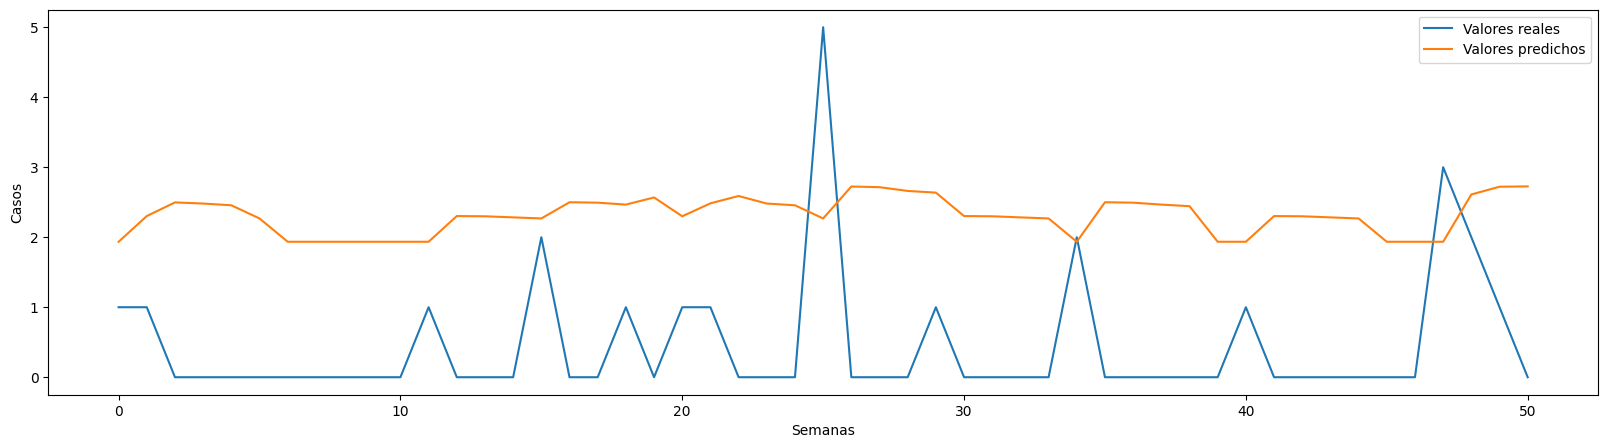

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y_new[22,:], label="Valores reales ")
plt.plot(Y_new_hat[22,:],label="Valores predichos")
plt.xlabel("Semanas")
plt.ylabel("Casos")
plt.legend();

Para el caso del Poblado obtenemos el siguiente resultado

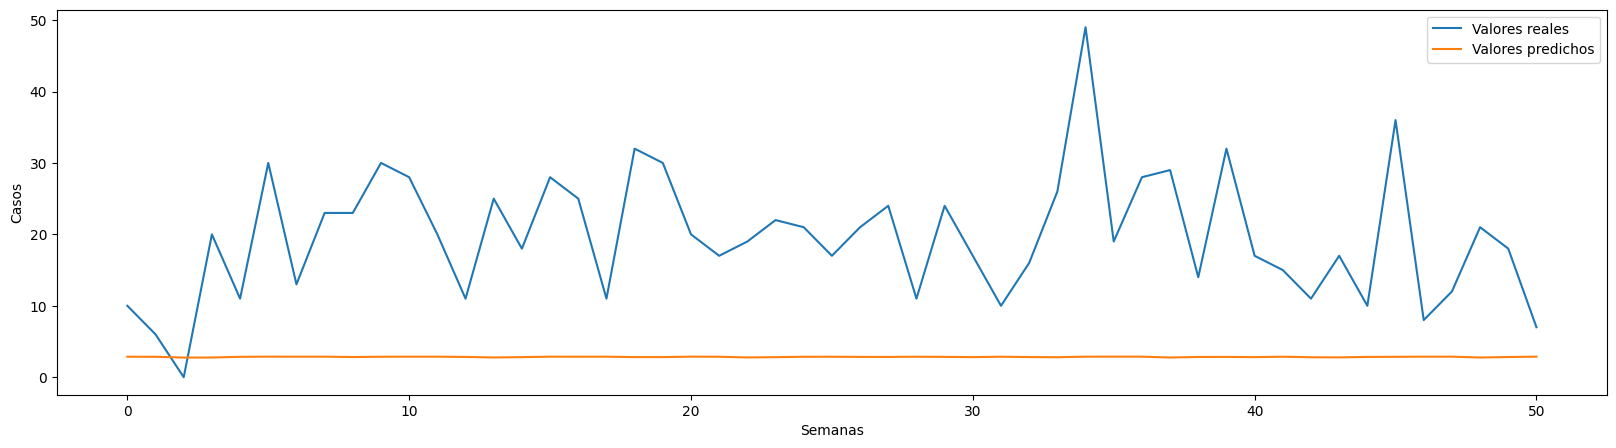

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y_new[33,:], label="Valores reales ")
plt.plot(Y_new_hat[33,:],label="Valores predichos")
plt.xlabel("Semanas")
plt.ylabel("Casos")
plt.legend();

Podemos usar el siguien dataframe para encontrar lo códigos de comunas y barrios.

In [ ]:
import geopandas as gpd


In [ ]:
mede_shp = gpd.read_file('/content/drive/MyDrive/Maestria_eafit/catastro/catastro.shp')

In [ ]:
mede_shp[mede_shp.COMUNA.isin(['03'])]

,OBJECTID,CODIGO,COMUNA,BARRIO,NOMBRE_BAR,SECTOR,INDICADOR_,NOMBRE_COM,SHAPE__Are,SHAPE__Len,geometry
7,6760,0307,03,07,Manrique Central No. 2,1,U,MANRIQUE,194871.782227,2278.670635,"POLYGON ((-75.55155 6.26696, -75.55150 6.26694..."
13,6766,0301,03,01,La Salle,1,U,MANRIQUE,409290.565430,4322.843585,"POLYGON ((-75.54846 6.28550, -75.54846 6.28548..."
54,6807,0303,03,03,Campo Valdés No. 2,1,U,MANRIQUE,396462.069336,3142.635466,"POLYGON ((-75.55166 6.27677, -75.55156 6.27674..."
66,6819,0302,03,02,Las Granjas,1,U,MANRIQUE,636886.641113,3958.150564,"POLYGON ((-75.54334 6.28265, -75.54335 6.28256..."
121,6874,0304,03,04,Santa Inés,1,U,MANRIQUE,295114.158203,2940.564330,"POLYGON ((-75.54745 6.27513, -75.54745 6.27513..."
152,6905,0313,03,13,María Cano Carambolas,1,U,MANRIQUE,281799.072754,3354.725129,"POLYGON ((-75.53817 6.28607, -75.53816 6.28607..."
154,6907,0312,03,12,Oriente,1,U,MANRIQUE,491107.129883,3593.204828,"POLYGON ((-75.53745 6.27944, -75.53737 6.27941..."
179,6932,0310,03,10,Versalles No. 2,1,U,MANRIQUE,193760.779297,2826.318837,"POLYGON ((-75.54110 6.26795, -75.54109 6.26795..."
180,6933,0305,03,05,El Raizal,1,U,MANRIQUE,271095.772949,2894.183601,"POLYGON ((-75.54260 6.26906, -75.54260 6.26905..."
207,6960,0308,03,08,Manrique Oriental,1,U,MANRIQUE,398433.748047,3181.302464,"POLYGON ((-75.54626 6.26740, -75.54624 6.26734..."


# **Probemos con Regresiones**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


Cargo las variables estaticas con los conteos de casos por barrio entre el periodo analizado 2018-2022.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Maestria_eafit/conteo_hurtos/var_estaticas.csv', index_col=0, dtype={'comuna':'string','barrio':'string'})
df.head()

,comuna,barrio,shape__are,nro_casos,nro_venteros,nro_sit_turisticos,nro_centros_salud,nro_postes_alumb,nro_paraderos_bus,nro_inst_educ,...,nro_hoteles_hosta,nro_iglesias,nro_tiend_ropa,nro_cent_mascotas,nro_entre_nocturno,nro_centros_medicos,nro_rutas_ciclismo,nro_rutas_buses,nro_quebradas,geometry
0,13,05,101866.863770,72,0.0,0.0,0.0,13.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,20.0,POLYGON ((-75.60794628069777 6.264912299073802...
1,07,01,490437.147949,342,0.0,0.0,3.0,143.0,11.0,0.0,...,2.0,1.0,0.0,0.0,0.0,1.0,3.0,39.0,12.0,POLYGON ((-75.57687504293696 6.266628901422282...
2,05,10,421343.229492,661,0.0,0.0,0.0,268.0,13.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,15.0,13.0,26.0,"POLYGON ((-75.56621133328895 6.29585949675556,..."
3,15,11,689537.432617,587,0.0,0.0,4.0,138.0,14.0,6.0,...,4.0,7.0,11.0,5.0,0.0,2.0,0.0,3.0,30.0,POLYGON ((-75.58774197595154 6.202764572029765...
4,11,13,365142.314453,1862,0.0,0.0,0.0,105.0,16.0,3.0,...,42.0,10.0,43.0,7.0,2.0,34.0,1.0,32.0,5.0,POLYGON ((-75.59327925983631 6.261893505292394...


In [ ]:
df.shape

(265, 57)

Inicialment quitamos algunas columnas que no son necesarias

In [ ]:
df = df.loc[:, ~df.columns.isin(['comuna','barrio','geometry','key','shape__are'])]

In [ ]:
df.columns

Index(['nro_casos', 'nro_venteros', 'nro_sit_turisticos', 'nro_centros_salud',
       'nro_postes_alumb', 'nro_paraderos_bus', 'nro_inst_educ', 'nro_hoteles',
       'nro_esc_deportivos', 'nro_centrocomercial', 'nro_camaras',
       'nro_bibliotecas', 'nro_acopios_taxi', 'nro_arboles', 'nro_cam_ars',
       'nro_cam_fotodeteccion', 'nro_semaforos', 'nro_estaciones_metro',
       'nro_hacienda_servicios', 'nro_hacienda_comercio',
       'nro_hacienda_industria', 'nro_hacienda_financiero',
       'nro_hacienda_trat_especial', 'nro_paraderos_tpublico',
       'nro_centros_residuos', 'nro_predios', 'nro_farmacias',
       'nro_muebles_tienda', 'nro_cent_policiales', 'nro_est_gasolina',
       'nro_cajeros', 'nro_acond_fisico', 'nro_enti_bancarias',
       'nro_restaurantes', 'nro_bares', 'nro_parqueaderos',
       'nro_tiend_joyeria', 'nro_tiend_tenis', 'nro_mall_comerciales',
       'nro_cafes', 'nro_licorerias', 'nro_tiend_varias', 'nro_supermercados',
       'nro_casinos', 'nro_hoteles_

Dividimos nuestra variable a predecir de las características

In [ ]:
X = df.drop(columns=['nro_casos'])
y = df.nro_casos

Estandarizamos la matriz de caracteristicas

In [ ]:
X_std = data_scaler(X)

Realizamos el train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=12)

Veamos como actúa un bosque sin optimizar


In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
RandomForest_metrics = metrics(y_test, regr.predict(X_test))

MAE :  272.7355588507925
MSE :  176117.8840521908
R^2 :  0.689281670778674


Podemos ver la importancia para estas características

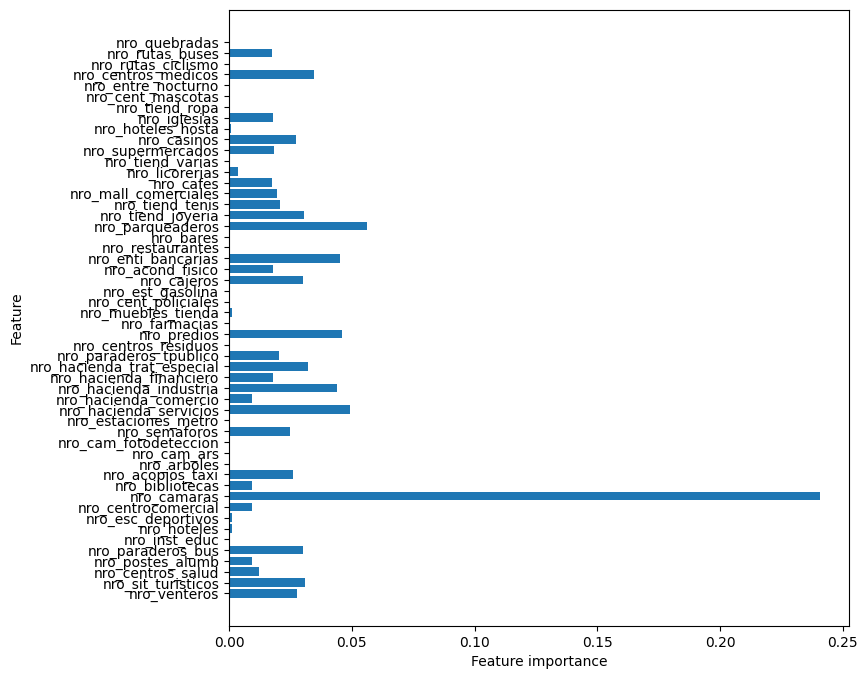

In [ ]:
plot_feature_importances(regr, X)

Búsquemos  optimizar usando un gridsearch

In [ ]:
# Buscar parametros optimos para Random Forest
from sklearn.model_selection import GridSearchCV

param_grid={
            'max_depth': [None, 3, 7],
            'n_estimators': [100, 250, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            }

grid_search = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid=param_grid,
            cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Mejores parametros:', grid_search.best_params_, grid_search.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores parametros: {'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500} RandomForestRegressor(max_depth=7, max_features='auto', n_estimators=500)


In [ ]:
RandomForest = RandomForestRegressor(max_depth = 7, n_estimators = 500, max_features ='auto')
RandomForest.fit(X_train, y_train)
RandomForest_metrics = metrics(y_test, RandomForest.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE :  196.12238145647763
MSE :  88748.03529641083
R^2 :  0.8434250933834506


De esta manera podemos encontrar un mejor valor par $R^{2}$. De esta manera encontramos los nuevos valores para la importancia de las características dentro del modelo.

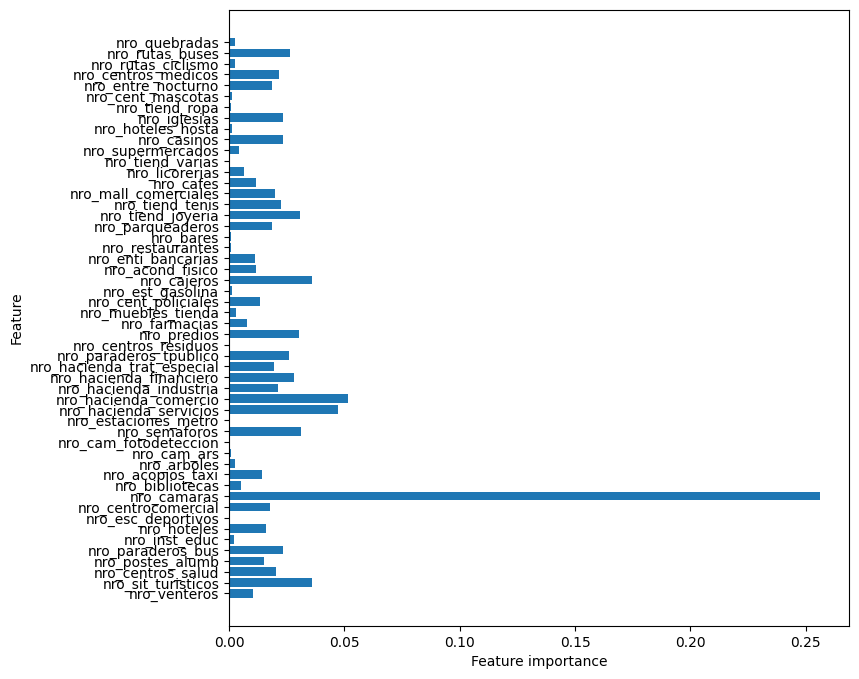

In [ ]:
plot_feature_importances(RandomForest, X)

**Veamos otras regresiones**



In [ ]:
#Regresion lineal
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)
regression_metrics = metrics(y_test,regression.predict(X_test))

MAE :  297.63019233032276
MSE :  408310.72630446416
R^2 :  0.2796323475992214


In [ ]:
# Buscar parametros optimos para Decision Tree
param_grid = {
    'max_depth': [None, 3, 5, 10], 
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [None, 1, 2, 3, 4], 
    'min_samples_split': [2, 3, 4]}    

grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Mejores parametros', grid_search.best_params_, grid_search.best_estimator_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Mejores parametros {'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'random_state': 1} DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=1)


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
DecisionTree = DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_split=2, random_state=1)
DecisionTree.fit(X_train, y_train)
DecisionTree_metrics = metrics(y_test,DecisionTree.predict(X_test))

MAE :  284.4287619063724
MSE :  281390.6774205928
R^2 :  0.5035527390240861


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
# Buscar parametros optimos para XGBoost
param_grid = {
           'min_child_weight': [1, 4, 7],
           'gamma': [0, 0.5, 1],
           'subsample': [0.8, 1],
           'colsample_bytree':[0.8, 1],
           'max_depth': [3, 6, 9],
           }

grid_search = GridSearchCV(
           estimator=XGBRegressor(objective = 'reg:squarederror'),
           param_grid=param_grid,
           cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Mejores parametros', grid_search.best_params_, grid_search.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parametros {'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8} XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
XGBR = XGBRegressor(objective = 'reg:squarederror',
                      colsample_bytree=0.8, gamma=1,
                      max_depth=6, min_child_weight=1,
                      subsample=0.8)
XGBR.fit(X_train, y_train)
XGBR_metrics = metrics(y_test, XGBR.predict(X_test))


MAE :  219.18936495780946
MSE :  126917.65645309049
R^2 :  0.7760838294530943


De los modelos implementados el mejor valor obtenido para el **R^{2}** fue el encontrado por el RandomForest.



###**Continuemos con nuestro analisis**

Veamos las correlaciones entre variables

<Axes: >

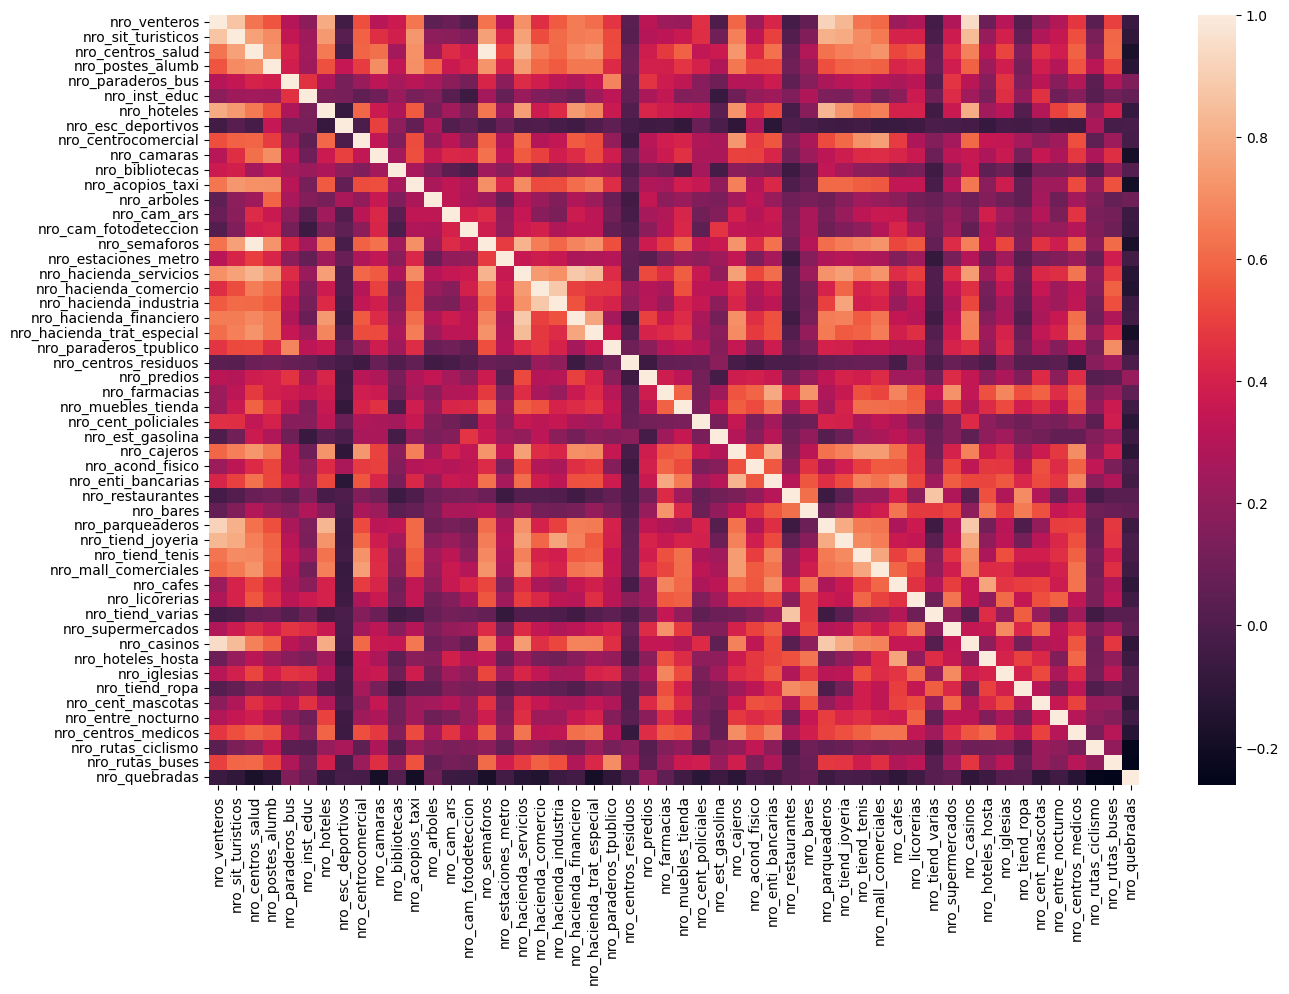

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(X.corr(), ax=ax, annot=False)

Depuramos algunas que se ven altamente correlacionadas

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
X.drop(to_drop, axis=1, inplace=True)

In [ ]:
to_drop

['nro_semaforos', 'nro_parqueaderos', 'nro_casinos']

In [ ]:
X_new = X

Añadimos una variable dummy al array para sacar aquellas características que no aportan tanto al RandomForest

In [ ]:
X_new['dummy'] = np.random.randn(265)

Estandarizamos de nuevo

In [ ]:
X_std_new = data_scaler(X_new)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std_new, y, test_size=0.3, random_state=12)

In [ ]:
# Buscar parametros optimos para Random Forest
param_grid={
            'max_depth': [None, 3, 7],
            'n_estimators': [100, 250, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            }

grid_search = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid=param_grid,
            cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Mejores parametros:', grid_search.best_params_, grid_search.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores parametros: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100} RandomForestRegressor(max_features='auto')


In [ ]:
RandomForest = RandomForestRegressor(max_depth = None, n_estimators = 100, max_features ='auto')
RandomForest.fit(X_train, y_train)
RandomForest_metrics = metrics(y_test, RandomForest.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE :  202.26975
MSE :  93718.068435
R^2 :  0.8346566460374707


In [ ]:
n_features = X_new.shape[1]
gp = pd.DataFrame({'cols':X_new.columns.to_list(), 'importance': RandomForest.feature_importances_})
gp.sort_values(by =['importance'], ascending=False, inplace=True)

Text(0, 0.5, 'Feature')

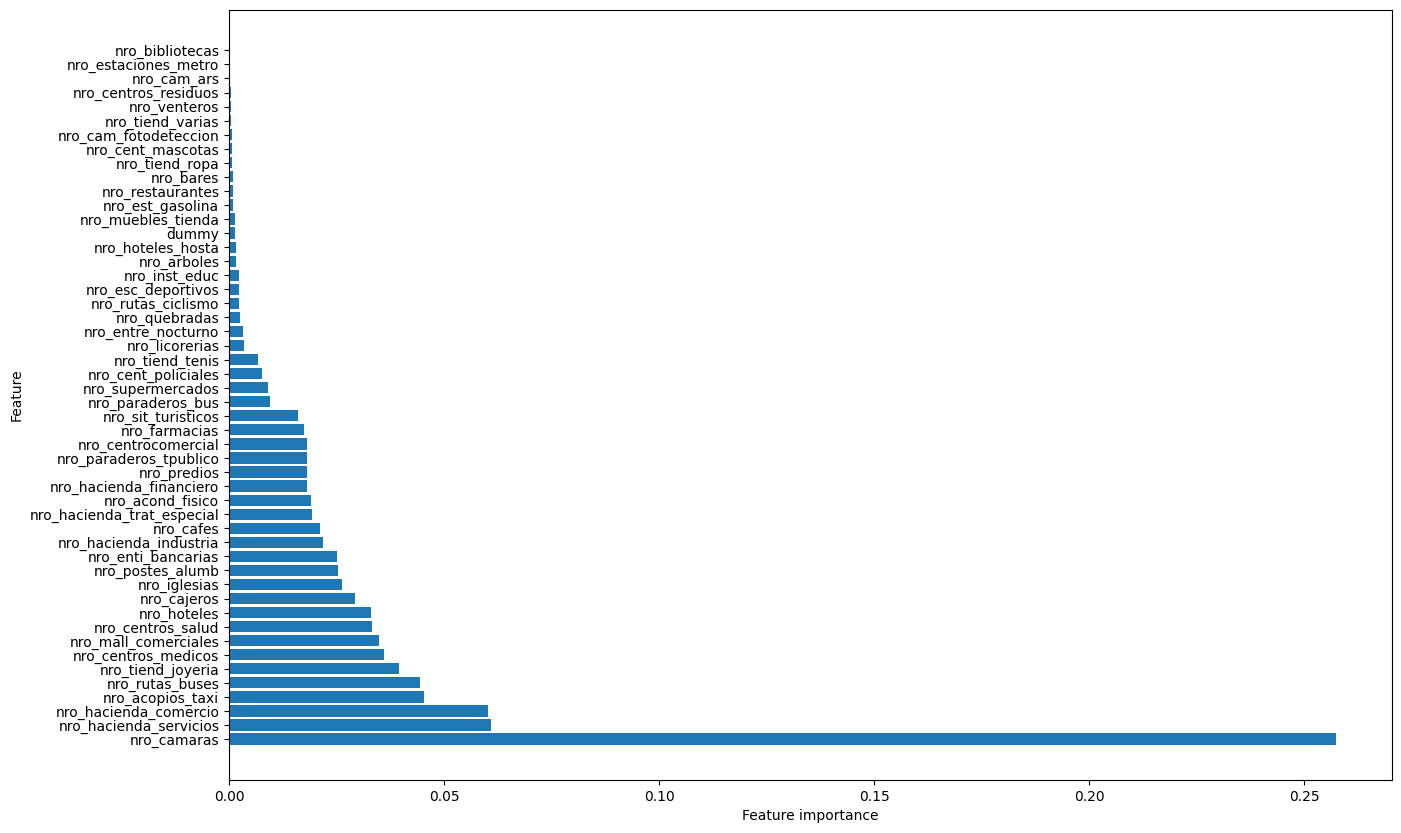

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(range(n_features), gp.importance, align='center')
plt.yticks(np.arange(n_features), gp.cols)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
  

Quitamos aquellas por debajo de la variable dummy

In [ ]:
remove_cols = ['nro_muebles_tienda','nro_est_gasolina','nro_restaurantes','nro_bares','nro_tiend_ropa','nro_cent_mascotas','nro_cam_fotodeteccion',
               'nro_tiend_varias','nro_venteros','nro_centros_residuos','nro_cam_ars','nro_estaciones_metro','nro_bibliotecas','dummy']

In [ ]:
X_new = X.drop(columns=remove_cols)

In [ ]:
X_std_new = data_scaler(X_new)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std_new, y, test_size=0.3, random_state=12)

In [ ]:
# Buscar parametros optimos para Random Forest
param_grid={
            'max_depth': [None, 3, 7],
            'n_estimators': [100, 250, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            }

grid_search = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid=param_grid,
            cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Mejores parametros:', grid_search.best_params_, grid_search.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores parametros: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100} RandomForestRegressor(max_features='auto')


In [ ]:
RandomForest = RandomForestRegressor(max_depth = None, n_estimators = 500, max_features ='sqrt')
RandomForest.fit(X_train, y_train)
RandomForest_metrics = metrics(y_test, RandomForest.predict(X_test))

MAE :  197.11380000000003
MSE :  88064.16958660001
R^2 :  0.8446316125958959


In [ ]:
n_features = X_new.shape[1]
gp = pd.DataFrame({'cols':X_new.columns.to_list(), 'importance': RandomForest.feature_importances_})
gp.sort_values(by =['importance'], ascending=False, inplace=True)

Text(0, 0.5, 'Feature')

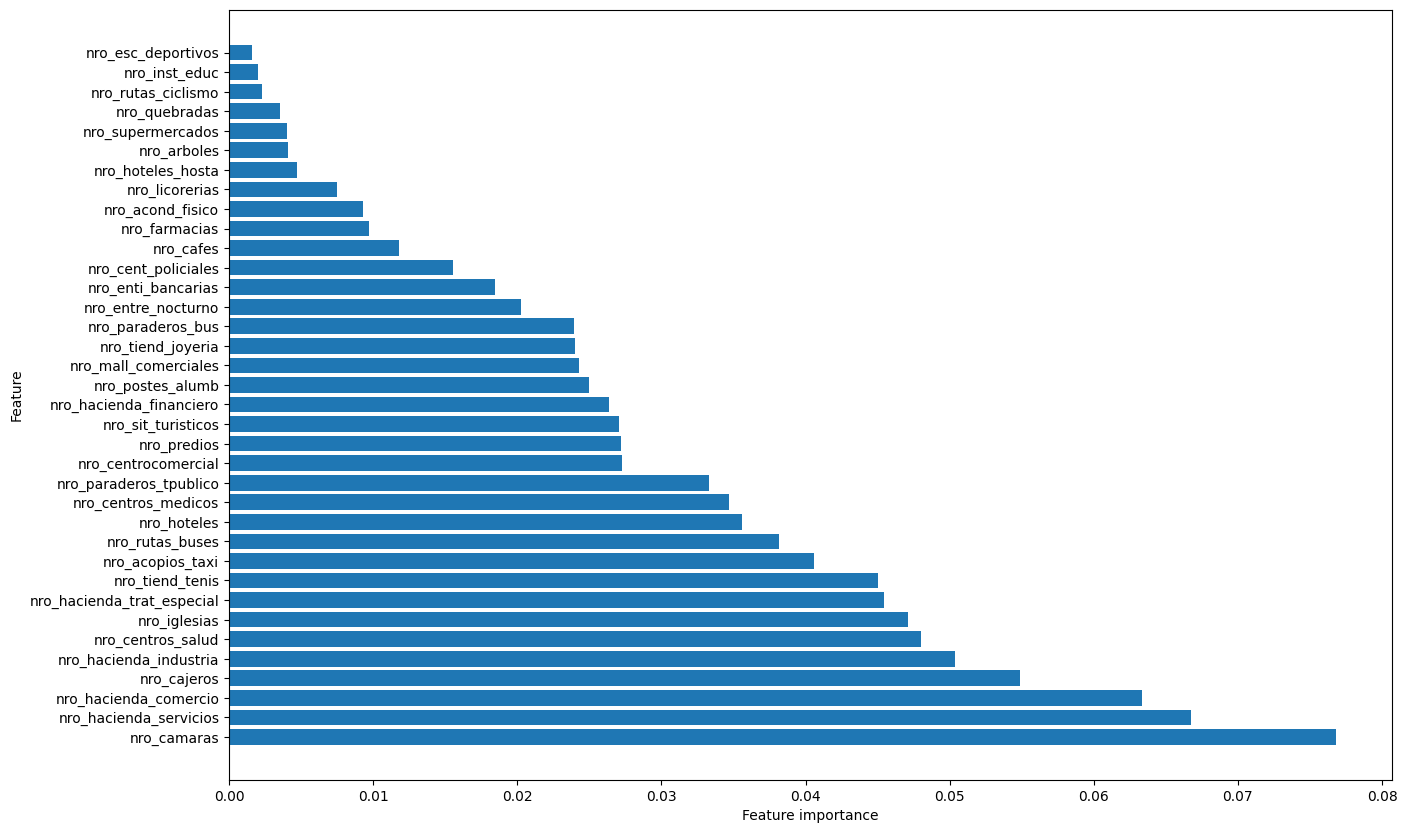

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(range(n_features), gp.importance, align='center')
plt.yticks(np.arange(n_features), gp.cols)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
  

Vemos como así la mayoría de características poseen un valor significativo en la importancia dentro del modelo. Las variables asociadas a los comercios de industria y comercio, tienen cierta imprecisión, pues no se tiene certeza de con qué comercios se relacionan, una buena idea sería observar cual es el resultado para el modelo luego de quitar dichas características

In [ ]:
X_new.drop(columns=['nro_hacienda_comercio','nro_hacienda_financiero','nro_hacienda_servicios','nro_hacienda_industria','nro_hacienda_trat_especial'], inplace=True)

In [ ]:
X_new.shape

(265, 31)

In [ ]:
X_std_new = data_scaler(X_new)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std_new, y, test_size=0.3, random_state=12)

In [ ]:
# Buscar parametros optimos para Random Forest
param_grid={
            'max_depth': [None, 3, 7],
            'n_estimators': [100, 250, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            }

grid_search = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid=param_grid,
            cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Mejores parametros:', grid_search.best_params_, grid_search.best_estimator_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores parametros: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 500} RandomForestRegressor(max_features='auto', n_estimators=500)


In [ ]:
#RandomForest = RandomForestRegressor(max_depth = None, n_estimators = 500, max_features ='sqrt')
RandomForest = RandomForestRegressor(max_depth = None, n_estimators = 500, max_features ='auto')
RandomForest.fit(X_train, y_train)
RandomForest_metrics = metrics(y_test, RandomForest.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE :  197.25369999999998
MSE :  102014.24936710001
R^2 :  0.820019998021781


In [ ]:
n_features = X_new.shape[1]
gp = pd.DataFrame({'cols':X_new.columns.to_list(), 'importance': RandomForest.feature_importances_})
gp.sort_values(by =['importance'], ascending=False, inplace=True)

Text(0, 0.5, 'Feature')

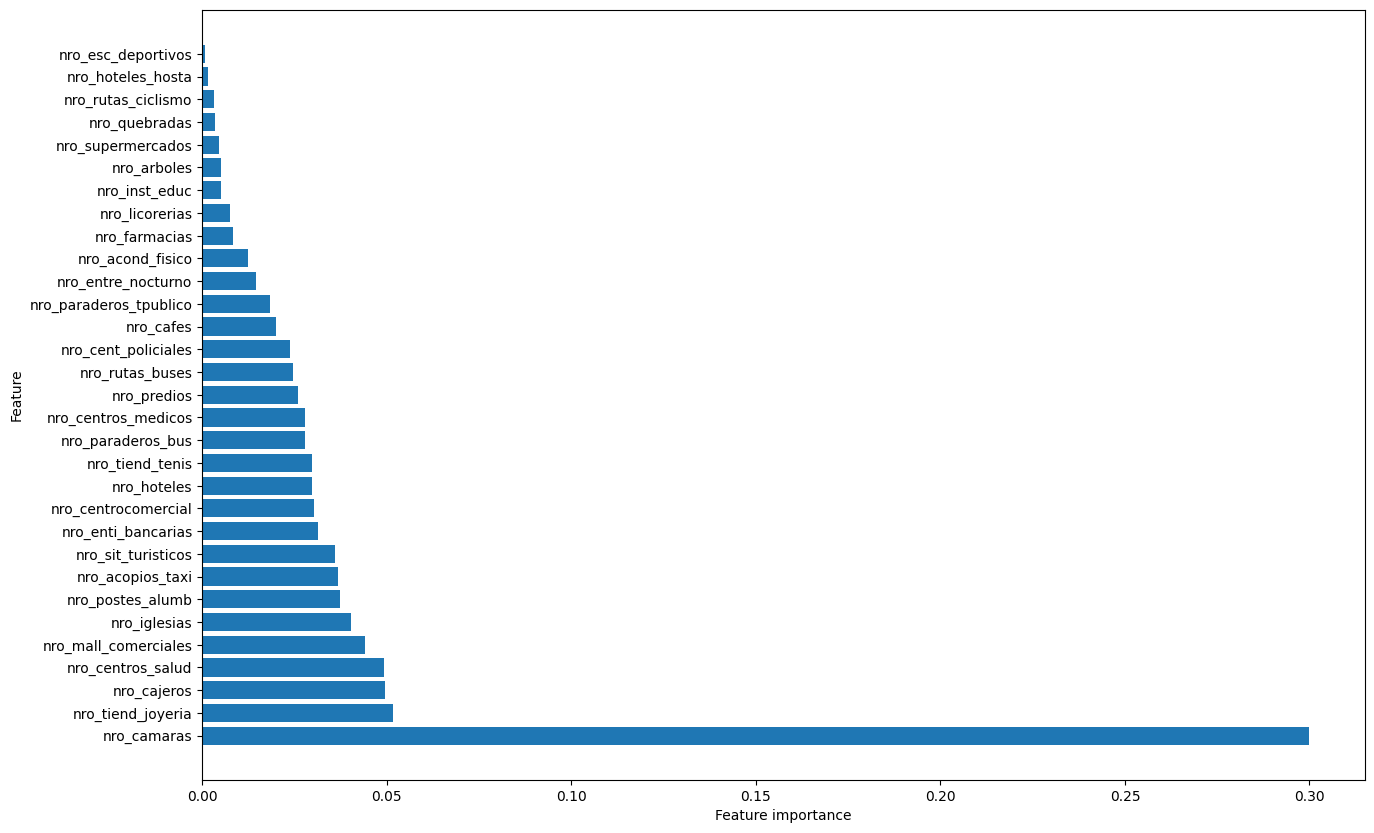

In [ ]:
plt.figure(figsize=(15,10))
plt.barh(range(n_features), gp.importance, align='center')
plt.yticks(np.arange(n_features), gp.cols)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Veamos la relación con la variable a predecir

In [ ]:
X_new

,nro_sit_turisticos,nro_centros_salud,nro_postes_alumb,nro_paraderos_bus,nro_inst_educ,nro_hoteles,nro_esc_deportivos,nro_centrocomercial,nro_camaras,nro_acopios_taxi,...,nro_cafes,nro_licorerias,nro_supermercados,nro_hoteles_hosta,nro_iglesias,nro_entre_nocturno,nro_centros_medicos,nro_rutas_ciclismo,nro_rutas_buses,nro_quebradas
0,0.0,0.0,13.0,5.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,20.0
1,0.0,3.0,143.0,11.0,0.0,0.0,0.0,0.0,8.0,5.0,...,1.0,0.0,0.0,2.0,1.0,0.0,1.0,3.0,39.0,12.0
2,0.0,0.0,268.0,13.0,3.0,0.0,10.0,0.0,10.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,15.0,13.0,26.0
3,0.0,4.0,138.0,14.0,6.0,0.0,10.0,0.0,25.0,0.0,...,6.0,6.0,9.0,4.0,7.0,0.0,2.0,0.0,3.0,30.0
4,0.0,0.0,105.0,16.0,3.0,2.0,0.0,1.0,14.0,5.0,...,11.0,3.0,5.0,42.0,10.0,2.0,34.0,1.0,32.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.0,0.0,60.0,13.0,2.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,49.0
261,0.0,0.0,208.0,3.0,3.0,0.0,3.0,0.0,4.0,4.0,...,0.0,0.0,1.0,3.0,1.0,2.0,0.0,0.0,7.0,35.0
262,0.0,0.0,72.0,27.0,2.0,0.0,2.0,0.0,6.0,0.0,...,0.0,2.0,1.0,0.0,3.0,2.0,0.0,0.0,7.0,56.0
263,0.0,0.0,222.0,45.0,5.0,0.0,11.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,11.0


In [ ]:
X_new['casos'] = y

In [ ]:
X_new.columns

Index(['nro_sit_turisticos', 'nro_centros_salud', 'nro_postes_alumb',
       'nro_paraderos_bus', 'nro_inst_educ', 'nro_hoteles',
       'nro_esc_deportivos', 'nro_centrocomercial', 'nro_camaras',
       'nro_acopios_taxi', 'nro_arboles', 'nro_paraderos_tpublico',
       'nro_predios', 'nro_farmacias', 'nro_cent_policiales', 'nro_cajeros',
       'nro_acond_fisico', 'nro_enti_bancarias', 'nro_tiend_joyeria',
       'nro_tiend_tenis', 'nro_mall_comerciales', 'nro_cafes',
       'nro_licorerias', 'nro_supermercados', 'nro_hoteles_hosta',
       'nro_iglesias', 'nro_entre_nocturno', 'nro_centros_medicos',
       'nro_rutas_ciclismo', 'nro_rutas_buses', 'nro_quebradas', 'casos'],
      dtype='object')

In [ ]:
import seaborn as sns

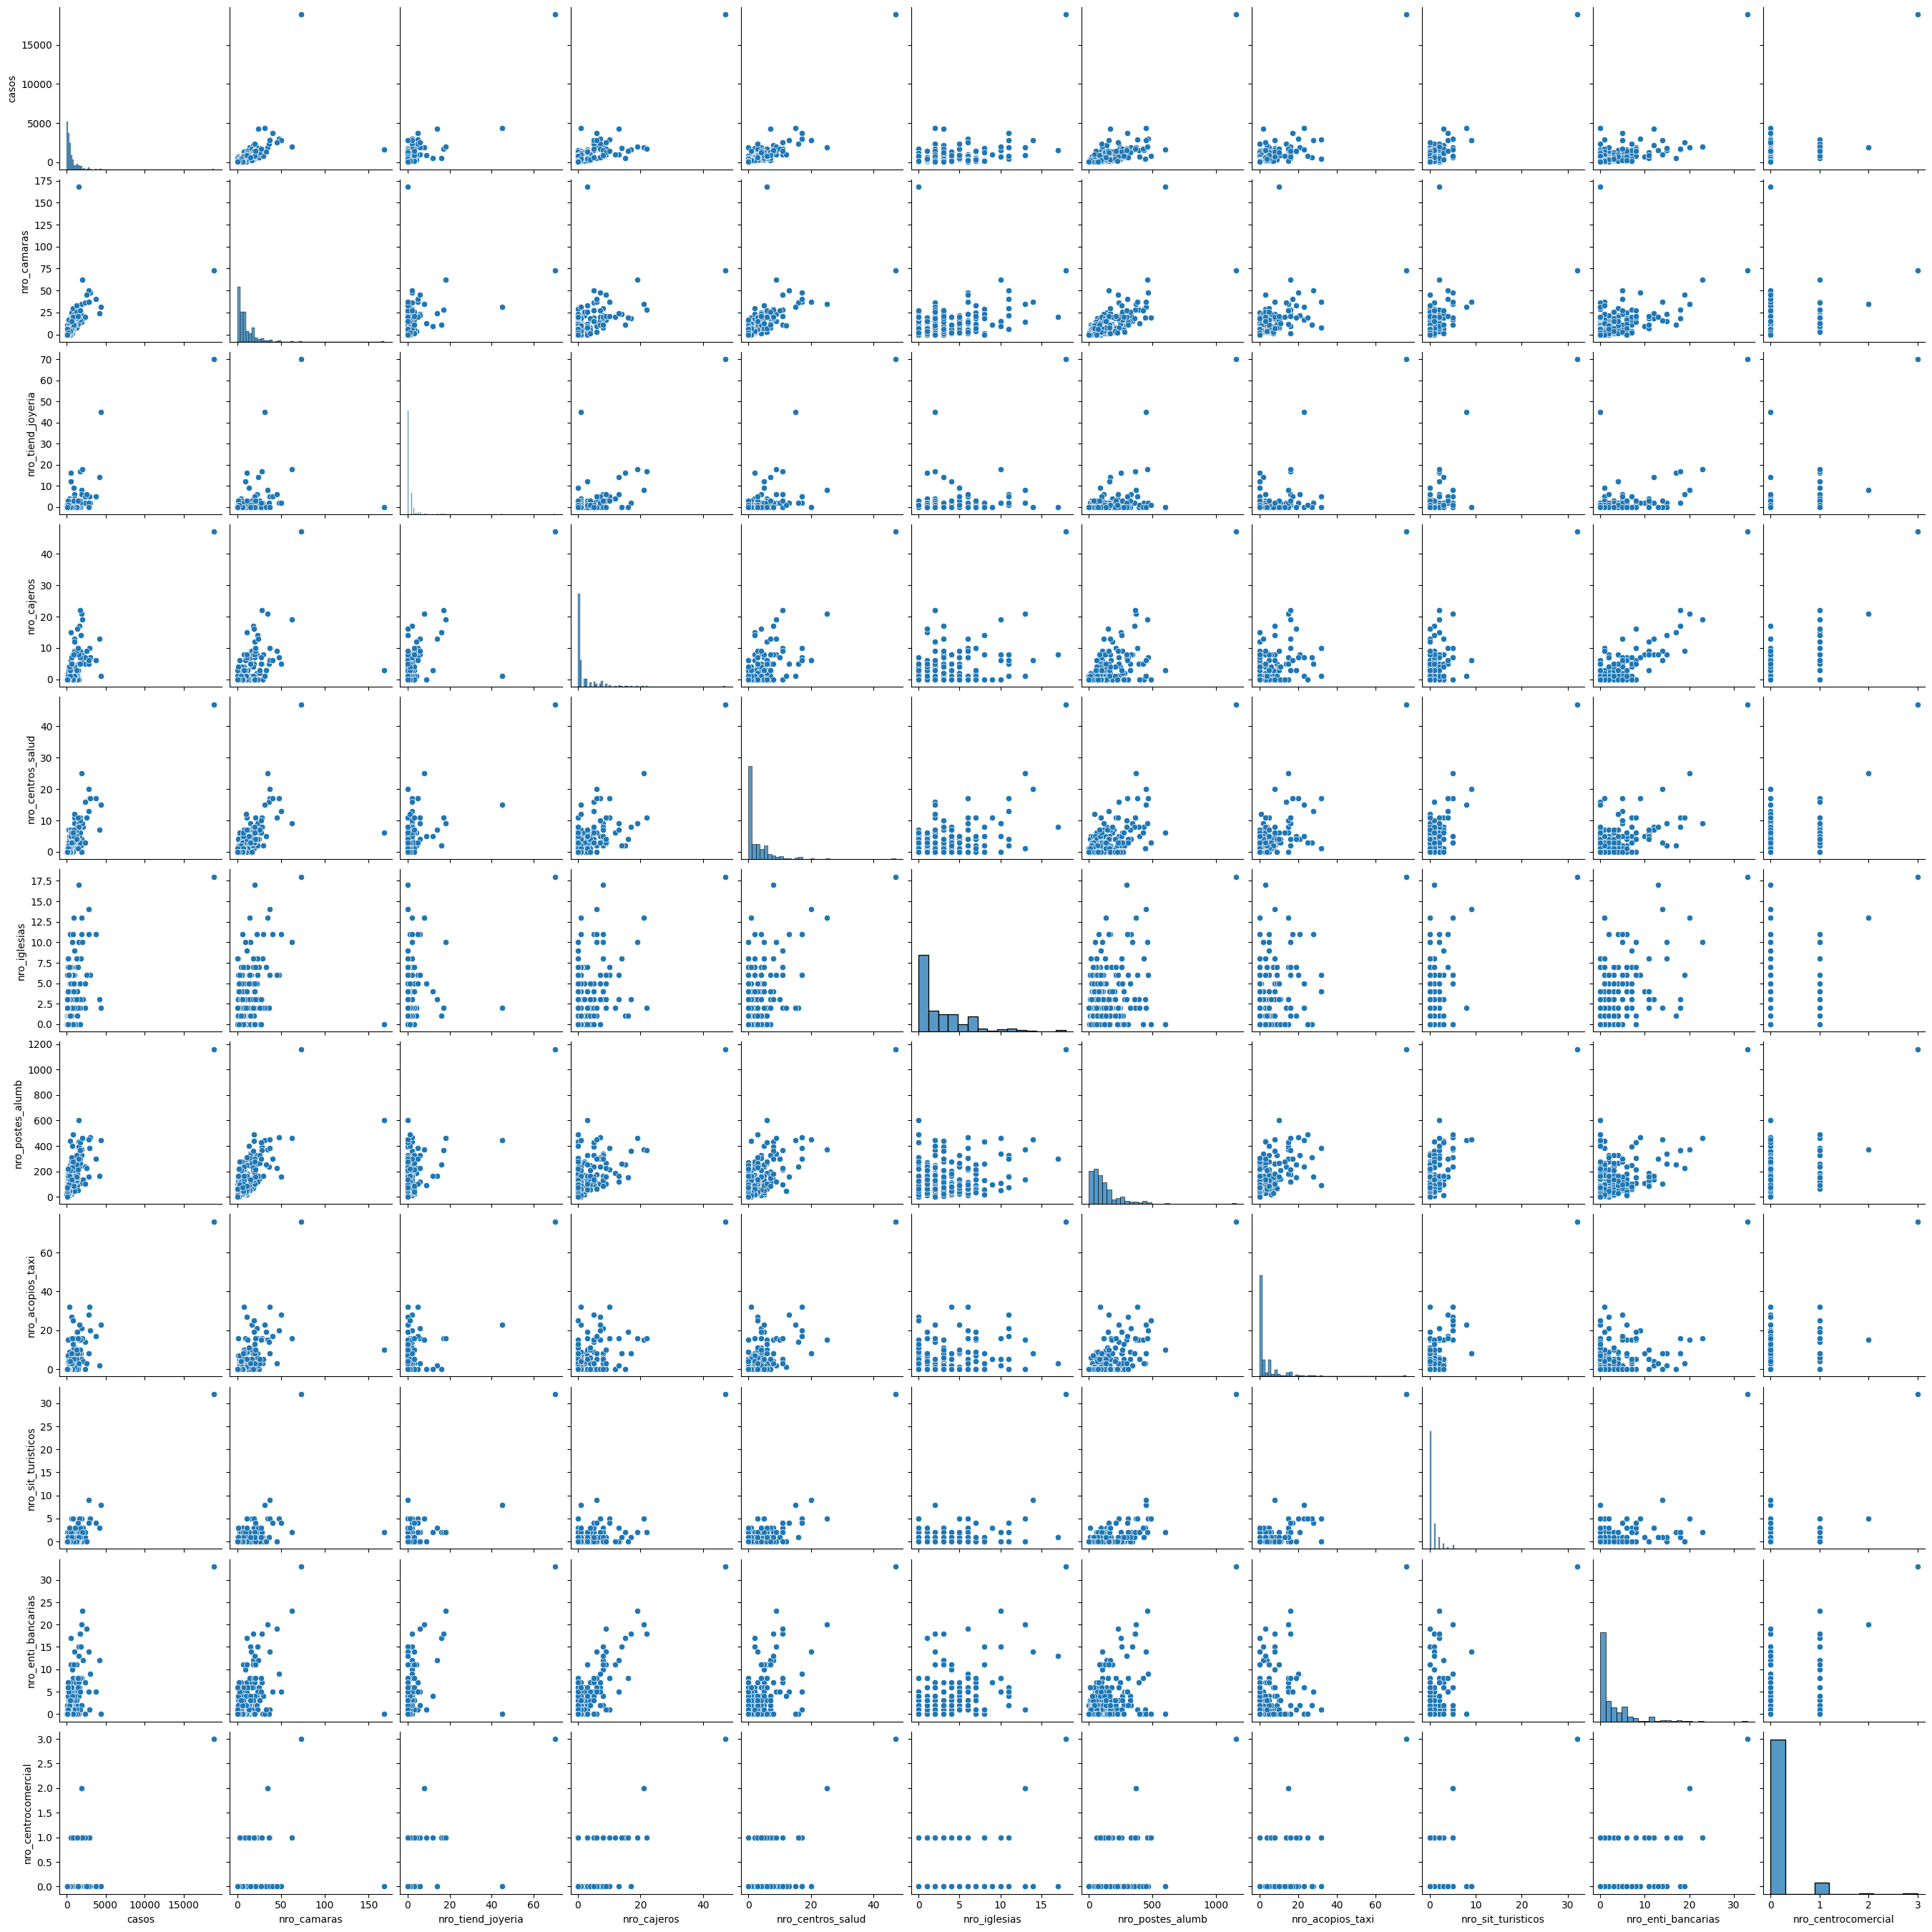

In [ ]:
sns.pairplot(X_new, vars=['casos','nro_camaras','nro_tiend_joyeria', 'nro_cajeros','nro_centros_salud','nro_iglesias','nro_postes_alumb','nro_acopios_taxi',
                          'nro_sit_turisticos','nro_enti_bancarias','nro_centrocomercial'])

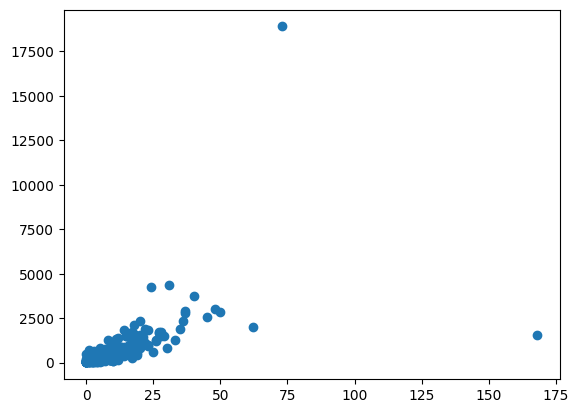

In [ ]:
plt.scatter(X_new.nro_camaras, X_new.casos)

<Axes: >

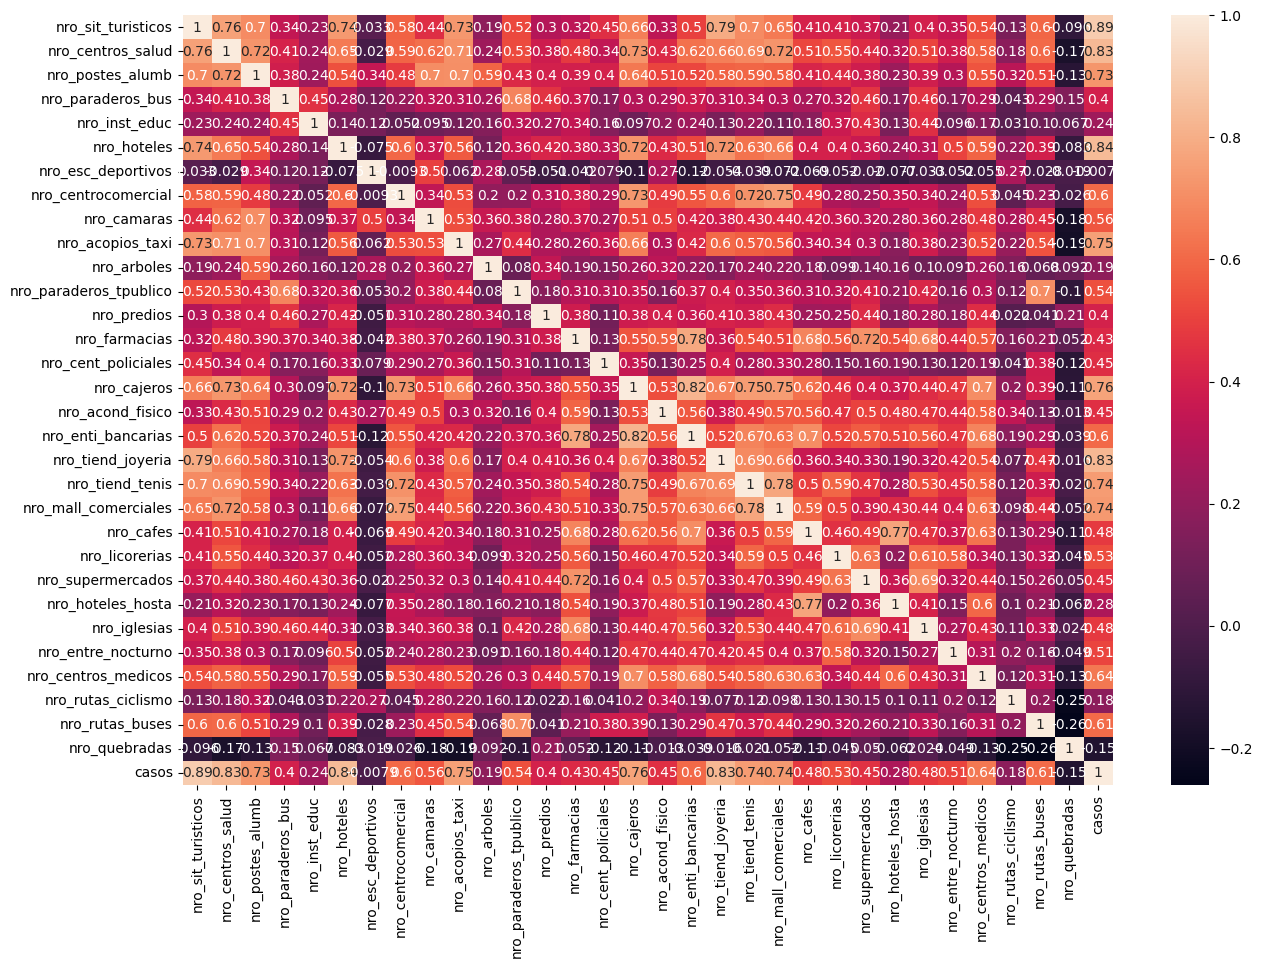

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(X_new.corr(), ax=ax, annot=True)

In [ ]:
X_new.corr().casos.sort_values(ascending=False)[['nro_camaras','nro_tiend_joyeria','nro_cajeros','nro_centros_salud','nro_mall_comerciales','nro_iglesias','nro_postes_alumb','nro_acopios_taxi']]

nro_camaras             0.555323
nro_tiend_joyeria       0.831591
nro_cajeros             0.764569
nro_centros_salud       0.832970
nro_mall_comerciales    0.736732
nro_iglesias            0.478785
nro_postes_alumb        0.727106
nro_acopios_taxi        0.754874
Name: casos, dtype: float64

In [ ]:
pd.DataFrame({'Características':X_new.corr().casos.index,'Correlación':X_new.corr().casos.values}).sort_values(by=['Correlación'],ascending=False)

,Características,Correlación
31,casos,1.000000
0,nro_sit_turisticos,0.893630
5,nro_hoteles,0.838167
1,nro_centros_salud,0.832970
18,nro_tiend_joyeria,0.831591
15,nro_cajeros,0.764569
9,nro_acopios_taxi,0.754874
19,nro_tiend_tenis,0.744423
20,nro_mall_comerciales,0.736732
2,nro_postes_alumb,0.727106
